---
title: "Multiple Regression"
date: "`r Sys.Date()`" 
format: html
---

- Using salary as the target variable
- Multiple Linear Regression
- Random Forest Regression


# Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv("lightcast_job_postings.csv")

# Show the first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72476 entries, 0 to 72475
Columns: 131 entries, ID to NAICS_2022_6_NAME
dtypes: bool(2), float64(11), int64(27), object(91)
memory usage: 71.5+ MB


,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,2024-09-06,2024-09-06 20:32:57.352 Z,0,2024-06-02,2024-06-08,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44,Retail Trade,441,Motor Vehicle and Parts Dealers,4413,"Automotive Parts, Accessories, and Tire Retailers",44133,Automotive Parts and Accessories Retailers,441330,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,2024-08-02,2024-08-02 17:08:58.838 Z,0,2024-06-02,2024-08-01,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56,Administrative and Support and Waste Managemen...,561,Administrative and Support Services,5613,Employment Services,56132,Temporary Help Services,561320,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-07,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52,Finance and Insurance,524,Insurance Carriers and Related Activities,5242,"Agencies, Brokerages, and Other Insurance Rela...",52429,Other Insurance Related Activities,524291,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-20,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52,Finance and Insurance,522,Credit Intermediation and Related Activities,5221,Depository Credit Intermediation,52211,Commercial Banking,522110,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,2024-06-19,2024-06-19 07:00:00.000 Z,0,2024-06-02,2024-06-17,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99,Unclassified Industry,999,Unclassified Industry,9999,Unclassified Industry,99999,Unclassified Industry,999999,Unclassified Industry


# Data Cleaning

In [3]:
df[["SALARY", "EDUCATION_LEVELS_NAME", "EMPLOYMENT_TYPE_NAME", "MIN_YEARS_EXPERIENCE", "TITLE_NAME"]].isnull().sum()


SALARY                   41658
EDUCATION_LEVELS_NAME        0
EMPLOYMENT_TYPE_NAME         0
MIN_YEARS_EXPERIENCE     23113
TITLE_NAME                   0
dtype: int64

In [4]:
df_clean = df.dropna(subset=["SALARY", "MIN_YEARS_EXPERIENCE"])


# Train/Test Split

In [6]:
# Choose the feature columns and target
features = ["EDUCATION_LEVELS_NAME", "EMPLOYMENT_TYPE_NAME", "MIN_YEARS_EXPERIENCE", "TITLE_NAME"]
target = "SALARY"

# Separate the feature set (X) and target (y)
X = df_clean[features]
y = df_clean[target]

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=688)


# Fit and Evaluate the Model

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=688)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


## RMSE & R²

In [10]:
import numpy as np

# Linear Regression Evaluation
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE:", lin_rmse)
print("Linear Regression R²:", lin_r2)

# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)


Linear Regression RMSE: 28050.088588949468
Linear Regression R²: 0.5876655737889311
Random Forest RMSE: 22953.53627379883
Random Forest R²: 0.7238911491667711


## Correlation

In [11]:
df_clean[["MIN_YEARS_EXPERIENCE", "SALARY"]].corr()


,MIN_YEARS_EXPERIENCE,SALARY
MIN_YEARS_EXPERIENCE,1.000000,0.510476
SALARY,0.510476,1.000000


## Feature Importance (for Random Forest)

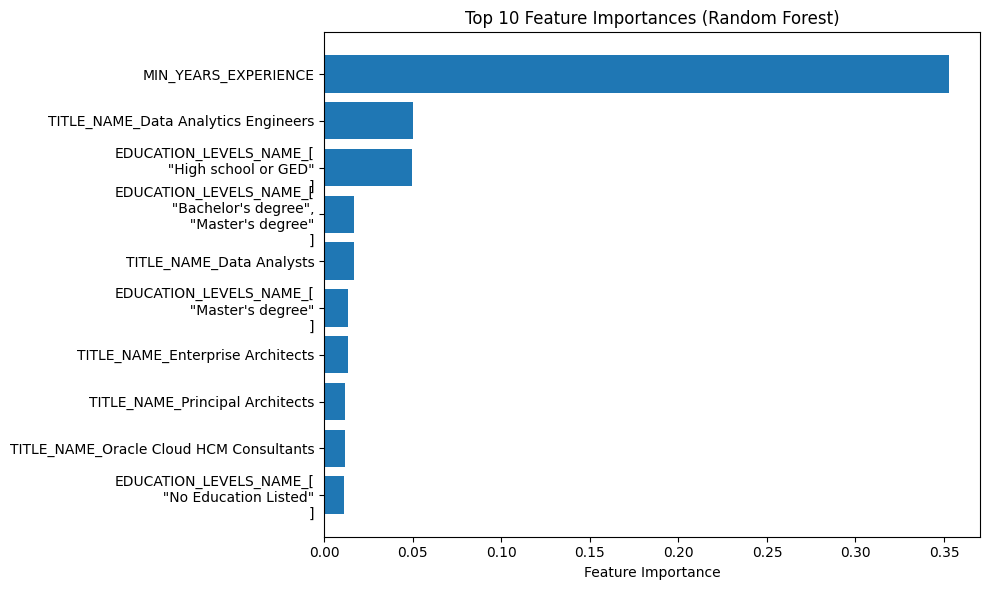

In [13]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_reg.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier sorting/plotting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:10], feat_imp_df["Importance"][:10])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Residual Analysis (for Regression)

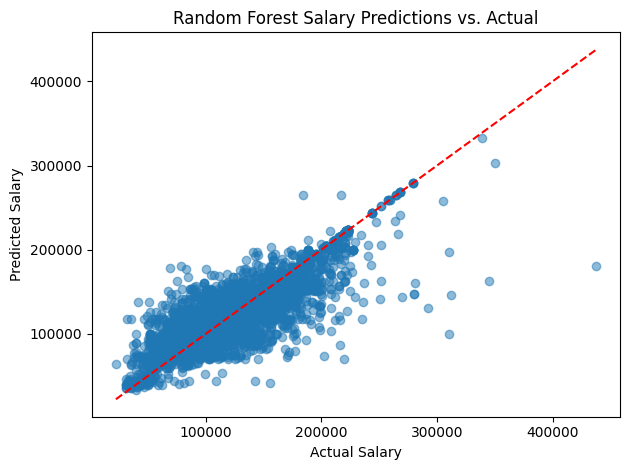

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest Salary Predictions vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


## Choropleth Map: Salary by State or City

In [21]:
import plotly.express as px

# Example: average salary by state
salary_by_state = df_clean.groupby("STATE_NAME")["SALARY"].mean().reset_index()

fig = px.choropleth(
    salary_by_state,
    locations="STATE_NAME",
    locationmode="USA-states",
    color="SALARY",
    scope="usa",
    title="Average Salary by State"
)

import plotly.io as pio
pio.renderers.default = 'browser'

fig.show()


/bin/sh: osascript: command not found


KeyboardInterrupt: 

## Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_reg, X_encoded, y, cv=5, scoring="r2")
print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())


KeyboardInterrupt: 